### Anomalia detekcio felugyelt tanulasi feladatok megoldasaval


In [1]:
# adatelemzos mantra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../data/Dataset_AnomalyDetection_MNW_40_100_publicdata.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,info,ID
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,detected_anomaly,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,detected_anomaly,1
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,detected_anomaly,2
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,detected_anomaly,3
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,detected_anomaly,4


In [4]:
df['target']=df['info'].apply(lambda x: 1 if x[0]=='d' else 0)
df['target'].mean()

0.016214025131738953

In [5]:
bemeno_valtozok= df.columns[:16]
#bemeno_valtozok

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16'],
      dtype='object')

In [6]:
train_df=df.copy()
test_df=df.copy()

# Igazi python modlelezés innen

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
modell=LogisticRegression()
modell

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

a C=1.0 azt jelenti h vmilyen büntetési tétel van az ellen h túl nagy súlyt kapjon egy-egy változó,
ha csökkented akkor eliminálod ezt a penalty-t lehet vele optimalizálni

In [9]:
modell.fit(train_df[bemeno_valtozok], train_df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
modell.intercept_

array([-1.02153702])

In [12]:
modell.coef_

array([[ 0.54444211, -0.00782401, -0.4281404 , -0.04045853,  0.36196825,
         0.14380064, -0.12920033, -0.07545138,  0.06739592,  0.01382175,
         0.09749197, -0.03414969, -1.0654782 , -0.17806503,  0.19311453,
         0.15884594]])

In [16]:
test_df['tipp']= modell.predict( test_df[bemeno_valtozok])

ez nem nagyon érdekes neked amúgy irl

In [17]:
test_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,info,ID,target,tipp
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,detected_anomaly,0,1,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,detected_anomaly,1,1,1
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,detected_anomaly,2,1,0
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,detected_anomaly,3,1,0
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,detected_anomaly,4,1,1
5,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,detected_anomaly,5,1,1
6,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7,detected_anomaly,6,1,0
7,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7,detected_anomaly,7,1,0
8,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7,detected_anomaly,8,1,0
9,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8,detected_anomaly,9,1,0


In [18]:
modell.predict_proba( test_df[bemeno_valtozok])

array([[0.64883315, 0.35116685],
       [0.39707324, 0.60292676],
       [0.72642188, 0.27357812],
       ...,
       [0.8274839 , 0.1725161 ],
       [0.7047272 , 0.2952728 ],
       [0.90872307, 0.09127693]])

In [21]:
test_df['p0']=0
test_df['p1']=1
test_df[['p0','p1']]=modell.predict_proba( test_df[bemeno_valtozok])
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,info,ID,target,tipp,p0,p1
0,2,8,3,5,1,8,13,0,6,6,...,0,8,0,8,detected_anomaly,0,1,0,0.648833,0.351167
1,5,12,3,7,2,10,5,5,4,13,...,2,8,4,10,detected_anomaly,1,1,1,0.397073,0.602927
2,4,11,6,8,6,10,6,2,6,10,...,3,7,3,9,detected_anomaly,2,1,0,0.726422,0.273578
3,2,1,3,1,1,8,6,6,6,6,...,1,7,5,10,detected_anomaly,3,1,0,0.517836,0.482164
4,4,11,5,8,3,8,8,6,9,5,...,0,8,9,7,detected_anomaly,4,1,1,0.137412,0.862588


(array([2.337e+03, 3.900e+01, 2.200e+01, 1.000e+01, 6.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 1.000e+00, 3.000e+00]),
 array([1.30009755e-06, 8.13292054e-02, 1.62657111e-01, 2.43985016e-01,
        3.25312921e-01, 4.06640827e-01, 4.87968732e-01, 5.69296637e-01,
        6.50624543e-01, 7.31952448e-01, 8.13280353e-01]),
 <a list of 10 Patch objects>)

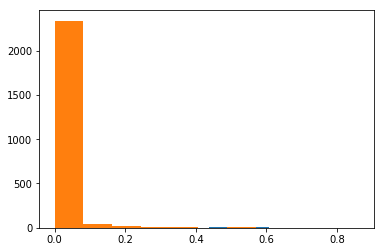

In [27]:
ismertek=test_df[test_df['target']==1]
nemismertek=test_df[test_df['target']==0]
plt.hist(ismertek['p1'], bins=10)
plt.hist(nemismertek['p1'], bins=10)

In [31]:
rend_df=test_df.sort_values("p1",ascending=False)
rend_df=rend_df[rend_df['target']==0]

In [35]:
vizsgalandok = rend_df[rend_df['p1']>0.3].copy()

In [36]:
vizsgalandok.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,info,ID,target,tipp,p0,p1
2430,2,8,3,6,2,8,8,6,9,5,...,0,8,9,8,no_info,2430,0,1,0.186720,0.813280
2453,2,0,2,1,1,8,7,4,6,5,...,0,8,7,8,no_info,2453,0,1,0.188458,0.811542
2435,3,9,3,6,2,3,6,6,10,7,...,0,8,7,8,no_info,2435,0,1,0.246989,0.753011
2460,2,11,3,8,2,15,4,4,5,13,...,0,7,0,8,no_info,2460,0,1,0.309854,0.690146
2374,1,5,1,4,1,8,7,1,7,7,...,0,8,3,7,no_info,2374,0,1,0.352629,0.647371


In [39]:
import nyomoz as ny

In [38]:
! ls #ettől már benn vagy a shell-ben és tudsz olyat h !cp nyomoz.py ../2019-04-03-AnomalyDetection2/

bszswu.ipynb		       GMW0XL.ipynb	   pv.ipynb
cb5qab.ipynb		       grgoaat.ipynb	   __pycache__
DAP_SK9D8E.ipynb	       gu87ao_04_09.ipynb  SP_20190409.ipynb
DM.ipynb		       GyL.ipynb	   szdori3.ipynb
Endre_.ipynb		       HidiAgnes.ipynb	   SZP.ipynb
EszterB.ipynb		       I0TFXT.ipynb	   SztupaG.ipynb
FMLVA8.ipynb		       J76LWL.ipynb	   Szz.ipynb
__GasparCsaba-Copy1.ipynb      NN.ipynb		   TP47VC.ipynb
__GasparCsaba.ipynb	       nyomoz.py	   Untitled2.ipynb
__GasparCsaba-MelykutiH.ipynb  Pcs1.ipynb	   Untitled.ipynb
GBYXUX.ipynb		       Pcs2.ipynb	   ZTR7EO.ipynb


In [40]:
watson=ny.AnomaliaNyomozo('../data/Dataset_AnomalyDetection_MNW_40_100_secretdata.csv')

In [41]:
watson.investigation(1)

'anomalia'

In [42]:
watson.investigation([1,2,3])

anomalia    3
Name: titok, dtype: int64


,ID,titok
1,1,anomalia
2,2,anomalia
3,3,anomalia


In [43]:
watson.investigation(vizsgalandok['ID'])

anomalia    20
Name: titok, dtype: int64


,ID,titok
2367,2367,anomalia
2368,2368,anomalia
2374,2374,anomalia
2375,2375,anomalia
2377,2377,anomalia
2381,2381,anomalia
2383,2383,anomalia
2388,2388,anomalia
2390,2390,anomalia
2394,2394,anomalia


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
modell_RF=RandomForestClassifier(n_estimators=100, max_depth=4)

In [52]:
modell_RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# n estimators adja meg hogy hány db fát szeretnél építeni